<ipython-input-6-588539698>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


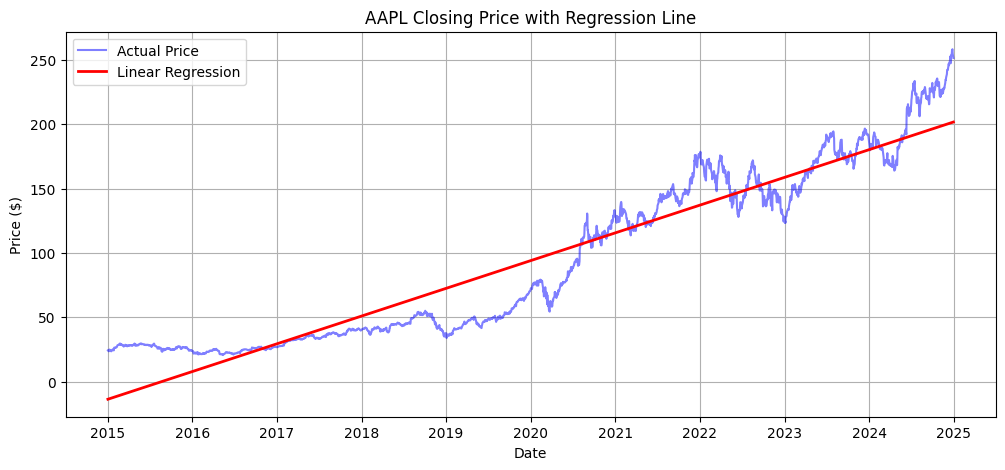

📉 Mean Squared Error on Test Data: 413.87
📘 Model Equation: Price = 0.06 * Days + -13.37


<ipython-input-6-588539698>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(model.coef_[0])
<ipython-input-6-588539698>:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


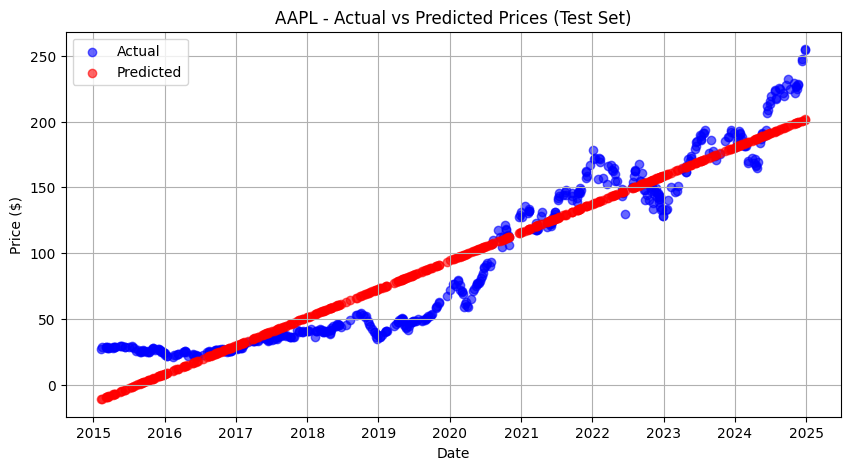


📅 Forecast Date: 2025-01-29
📌 Estimated AAPL Stock Price on that date: $203.65


In [6]:
# 📦 Install packages (Google Colab only)
!pip install yfinance scikit-learn matplotlib pandas --quiet

# 📥 Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import timedelta

# 📈 Download stock data
ticker = "AAPL"  # You can change to "GOOG", "TSLA", etc.
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")

# 🧹 Preprocess
df = data.reset_index()
df = df[['Date', 'Close']]
df.dropna(inplace=True)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['Days']]
y = df['Close']

# 📊 Plot full stock price with regression line (fitted on full data)
model_full = LinearRegression()
model_full.fit(X, y)
y_line = model_full.predict(X)

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], y, label='Actual Price', color='blue', alpha=0.5)
plt.plot(df['Date'], y_line, label='Linear Regression', color='red', linewidth=2)
plt.title(f'{ticker} Closing Price with Regression Line')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

# 🚂 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔍 Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"📉 Mean Squared Error on Test Data: {mse:.2f}")

# 📘 Show model equation
slope = float(model.coef_[0])
intercept = float(model.intercept_)
print(f"📘 Model Equation: Price = {slope:.2f} * Days + {intercept:.2f}")

# 📅 Convert test data to real dates for plotting
dates = df['Date'].min() + pd.to_timedelta(X_test['Days'], unit='D')

plt.figure(figsize=(10, 5))
plt.scatter(dates, y_test, label='Actual', color='blue', alpha=0.6)
plt.scatter(dates, y_pred, label='Predicted', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'{ticker} - Actual vs Predicted Prices (Test Set)')
plt.legend()
plt.grid()
plt.show()

# 🔮 Predict price after 30 days from latest known date
future_day = df['Days'].max() + 30
future_date = df['Date'].max() + timedelta(days=30)
future_price = model.predict([[future_day]])

# 📌 Show prediction result
print(f"\n📅 Forecast Date: {future_date.strftime('%Y-%m-%d')}")
print(f"📌 Estimated {ticker} Stock Price on that date: ${future_price[0][0]:.2f}")

